The dataset was downloaded from [Combining EEG and Eye-Tracking in Virtual Reality - Obtaining Fixation-Onset ERPs and ERSPs](https://osf.io/trfjw/).

### Importing packages & Loading the dataset ###

In [36]:
# importing all the necessery packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy

In [ ]:
"""
# filter by valid, hon, events = start of fix is "2"
# leave length (sec) = duration
df_filtered = df[(df['valid'] == 1) & (df['events'] == 2)]
df_filtered = df_filtered[['length', 'hon_all']]

# every hit object ('hon_all') which contains 'NPC' is a body
# every hit object ('hon_all') which contains 'face' is a face"""

In [ ]:
# Function to compute fixation durations stats
def compute_fixation_durations(fixations_df, fixation_type):
    """
    Compute average, min, and max duration for a given fixation type.
    """
    type_fixations = fixations_df[fixations_df['hon_all'] == fixation_type]
    return type_fixations['length'].agg(['mean', 'min', 'max', 'sum', 'median'])

# Function to categorize the fixations
def needed_categories(value):
    if pd.isnull(value):
        return value
    value_str = str(value)
    if 'NPC' in value_str:
        return 'body'
    elif 'face' in value_str:
        return 'face'
    else:
        return 'background'

# Function to calculate MAD
def median_abs_deviation(series):
    median = series.median()
    return (series - median).abs().median()

In [ ]:
# Base path where all files are located
base_path = "/Users/alina/Downloads/Thesis/raw/VR"

fixation_analysis = []
all_durations = []  # List to store all fixation durations across participants

for file_index, file in enumerate(os.listdir(base_path)):
    try:
        df = pd.read_csv(os.path.join(base_path, file))
        df_filtered = df[(df['valid'] == 1) & (df['events'] == 2)]
        df_filtered = df_filtered[['length', 'hon_all']]
        df_filtered['hon_all'] = df_filtered['hon_all'].apply(needed_categories)

        for ft in ['face', 'body', 'background']:
            durations = df_filtered[df_filtered['hon_all'] == ft]['length']
            for duration in durations:
                all_durations.append({
                    'Participant': file_index,
                    'Fixation Type': ft,
                    'Duration': duration
                })

        # Load your dataframe here 
        df = pd.read_csv(os.path.join(base_path, file))  

        # Filter the dataframe
        df_filtered = df[(df['valid'] == 1) & (df['events'] == 2)]
        df_filtered = df_filtered[['length', 'hon_all']] 
        df_filtered['hon_all'] = df_filtered['hon_all'].apply(needed_categories)
        
        # Grouping for fixation types
        fixation_types = ['face', 'body', 'background']
        
        fixation_counts = {f"{ft} fixations": len(df_filtered[df_filtered['hon_all'] == ft]) for ft in fixation_types}
        total_fixations = sum(fixation_counts.values())
        fixation_percentages = {f"{ft} fixation %": (count / total_fixations) * 100 for ft, count in fixation_counts.items()}

        # Compute the duration statistics
        duration_stats = {ft: compute_fixation_durations(df_filtered, ft) for ft in fixation_types}

        # Append the participant data
        fixation_analysis.append({
            "Participant index": file_index,  # Participant index is now being tracked by file_index
            **fixation_counts,
            "Total fixations": total_fixations,
            **{f"{ft} {stat} duration (s)": duration_stats[ft][stat] for ft in fixation_types for stat in ['mean', 'min', 'max', 'sum', 'median']},
        })

    except Exception as e:
        print(f"❌ Error processing file {file}: {e}")

# Create a DataFrame for the fixation analysis
fixation_analysis_df = pd.DataFrame(fixation_analysis)


save_path = os.path.join('/Users/alina/Downloads/Thesis/raw', f"VR fixation stats all recordings.csv")
fixation_analysis_df.to_csv(save_path, index=False)

fixation_analysis_df


❌ Error processing file .DS_Store: 'utf-8' codec can't decode byte 0x80 in position 3131: invalid start byte


,Participant index,face fixations,body fixations,background fixations,Total fixations,face mean duration (s),face min duration (s),face max duration (s),face sum duration (s),face median duration (s),body mean duration (s),body min duration (s),body max duration (s),body sum duration (s),body median duration (s),background mean duration (s),background min duration (s),background max duration (s),background sum duration (s),background median duration (s)
0,0,228,746,4187,5161,0.297096,0.043,1.734,67.738,0.2335,0.631200,0.043,279.859,470.875,0.2015,0.241280,0.024,18.065,1010.238,0.178
1,1,270,1073,3778,5121,0.893537,0.044,169.635,241.255,0.2110,0.263862,0.024,19.481,283.124,0.1890,0.365073,0.022,406.552,1379.244,0.166
2,2,133,852,3575,4560,0.305406,0.044,1.287,40.619,0.2350,0.288575,0.043,2.288,245.866,0.2330,0.280482,0.020,18.590,1002.724,0.222
3,4,170,865,4187,5222,0.275688,0.043,1.889,46.867,0.1955,0.254415,0.043,17.755,220.069,0.1780,0.238819,0.024,18.054,999.936,0.178
4,5,85,319,4665,5069,0.245247,0.044,1.056,20.846,0.2210,0.266354,0.042,1.611,84.967,0.2110,0.252797,0.022,18.624,1179.299,0.190
5,6,34,292,4895,5221,0.218441,0.056,0.743,7.427,0.1835,0.197360,0.043,0.966,57.629,0.1565,0.189803,0.033,17.805,929.087,0.156
6,7,437,926,4366,5729,0.239515,0.044,1.266,104.668,0.1780,0.264529,0.023,18.112,244.954,0.1890,0.217610,0.024,18.278,950.086,0.167
7,8,348,841,3687,4876,0.314534,0.042,17.905,109.458,0.1890,0.328247,0.024,18.532,276.056,0.2110,0.250875,0.023,18.077,924.977,0.189
8,9,527,947,3761,5235,0.282681,0.043,2.366,148.973,0.2110,0.233092,0.035,2.532,220.738,0.1890,0.240042,0.023,17.695,902.799,0.189
9,10,215,444,4632,5291,0.334670,0.044,17.948,71.954,0.1890,0.291649,0.044,18.108,129.492,0.1890,0.237835,0.024,77.077,1101.652,0.167


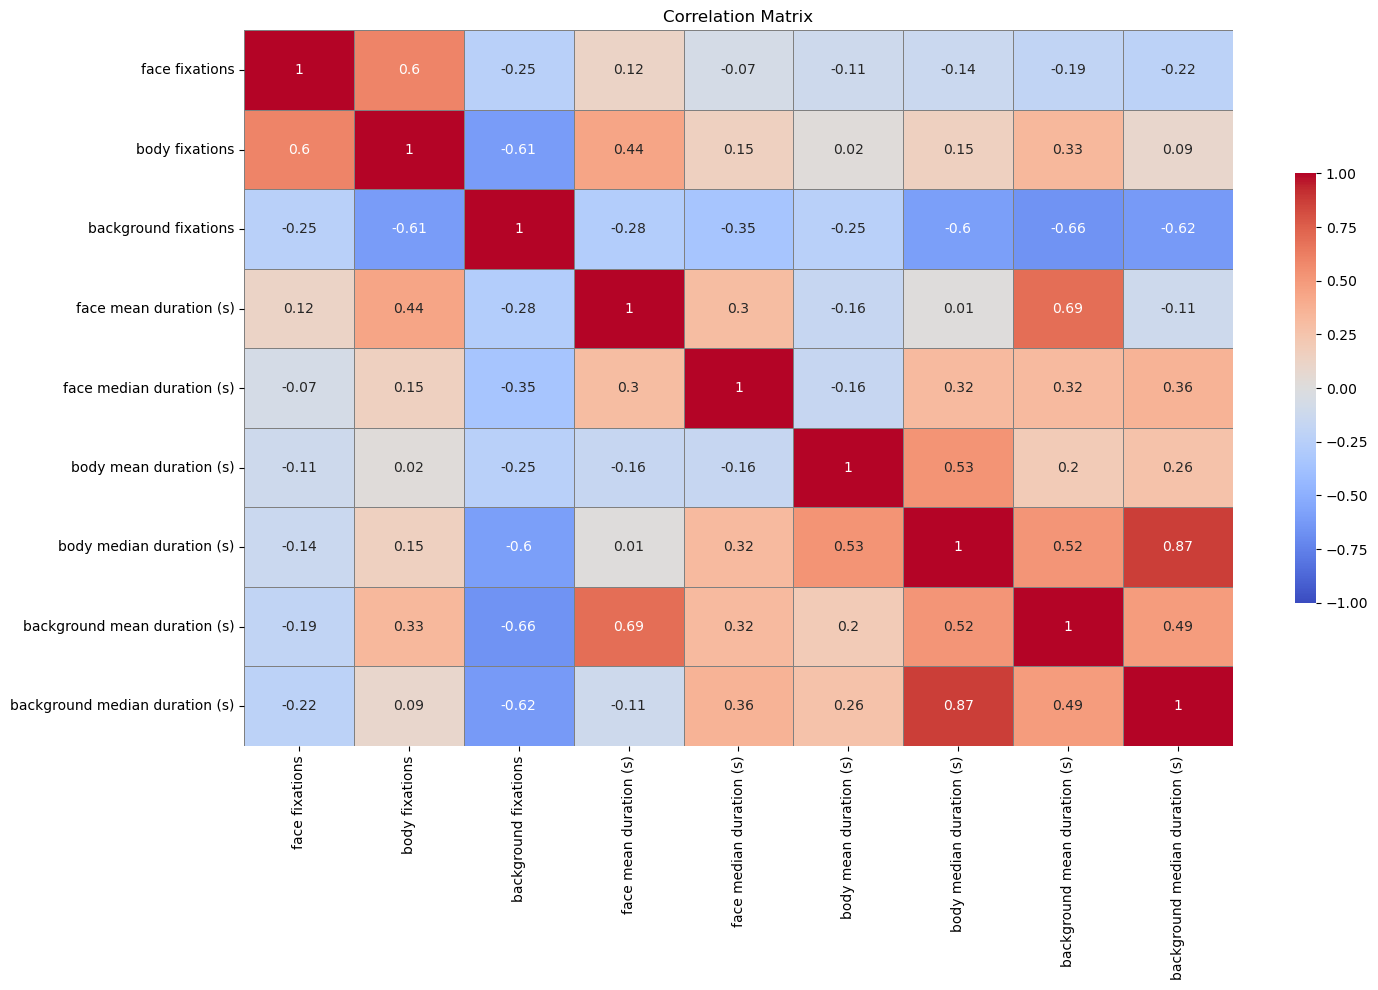

In [43]:
cols_to_exclude = ['Participant index', 'Total fixations', 
                   'face sum duration (s)', 'body sum duration (s)', 'background sum duration (s)',
                   'face min duration (s)', 'body min duration (s)', 'background min duration (s)',
                   'face max duration (s)', 'body max duration (s)', 'background max duration (s)']

# Create a new DataFrame excluding those columns
df_corr = fixation_analysis_df.drop(columns=cols_to_exclude)
corr_matrix = df_corr.corr().round(2)

plt.figure(figsize=(15, 10))

sns.heatmap(
    corr_matrix ,               
    annot=True,                  # Show correlation values in cells
    cmap='coolwarm',             # Color palette
    vmin=-1, vmax=1,             # Set color scale limits
    center=0,                    # Center the color map at 0 for balanced coloring
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.6}
)

plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [40]:
# Check if correlation is significant; r = Pearson correlation coefficient
r, p= scipy.stats.pearsonr(fixation_analysis_df["face fixations"], fixation_analysis_df["body fixations"])
display(r)
display(round(p,3))

0.5993751659005807

0.007

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_35419/2429906331.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_35419/2429906331.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels)


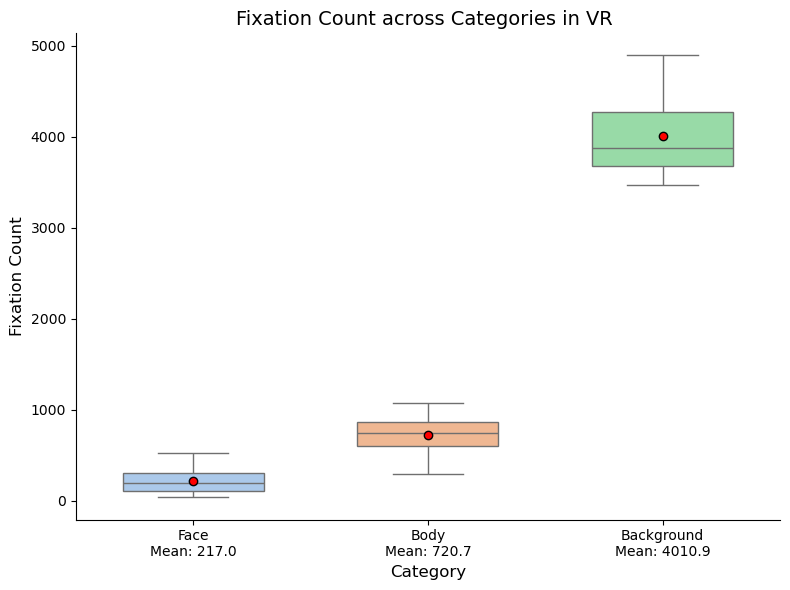

In [69]:
# List of fixation columns
fixation_cols = ['face fixations', 'body fixations', 'background fixations']

# Melt the DataFrame into long format
fixation_melted = fixation_analysis_df.melt(
    id_vars=['Participant index'],  # or use 'Participant' depending on your column name
    value_vars=fixation_cols,
    var_name='Category',
    value_name='Fixation Count'
)

# Rename categories for clarity
fixation_melted['Category'] = fixation_melted['Category'].str.replace(' fixations', '').str.capitalize()

# Define the order explicitly
category_order = [col.replace(' fixations', '').capitalize() for col in fixation_cols]

# Calculate mean fixation counts per category
group_means = fixation_melted.groupby('Category')['Fixation Count'].mean()
#group_medians = fixation_melted.groupby('Category')['Fixation Count'].median()

# Prepare labels with mean annotations
new_labels = [f"{cat}\nMean: {group_means[cat]:.1f}" for cat in category_order]

plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=fixation_melted,
    x='Category',
    y='Fixation Count',
    order=category_order,
    palette='pastel',
    showmeans=True,
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
    width=0.6
)

# Update x-axis tick labels to include mean info
ax.set_xticklabels(new_labels)

# Final plot formatting
ax.set_title("Fixation Count across Categories in VR ", fontsize=14)
ax.set_ylabel("Fixation Count", fontsize=12)
ax.set_xlabel("Category", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

Fixation Type
background     88.0
body          110.0
face          111.0
Name: Duration, dtype: float64

/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_35419/2429441009.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(
/var/folders/rl/39dttzx13m9b1_bh8gpvq64m0000gn/T/ipykernel_35419/2429441009.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_labels, fontsize=11)


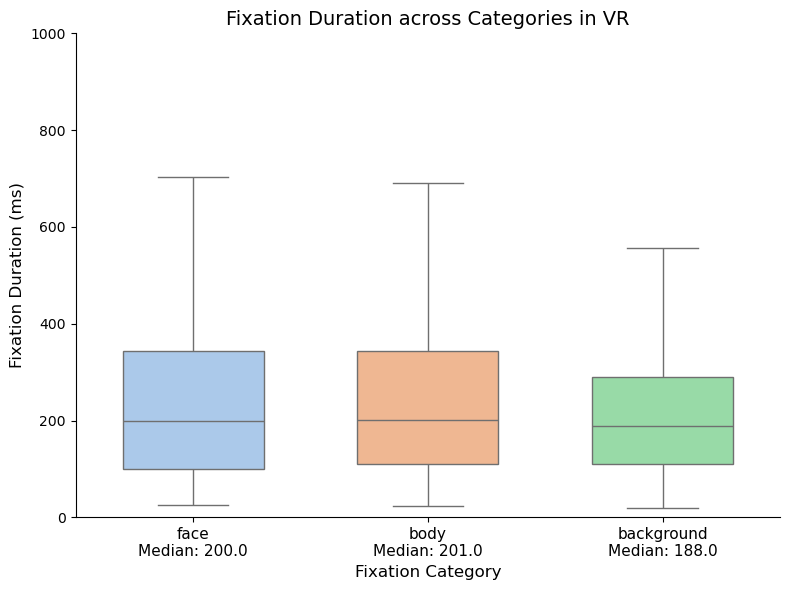

In [ ]:
# make a df with all durations for all recordings
durations_df = pd.DataFrame(all_durations)

# convert durations to ms 
durations_df['Duration'] = durations_df['Duration'] * 1000

# Compute group medians
group_medians = durations_df.groupby("Fixation Type")["Duration"].median().round(0)

group_mad = durations_df.groupby("Fixation Type")["Duration"].apply(median_abs_deviation).round(2)

display(group_mad)

# Set the order of categories (optional)
category_order = ['face', 'body', 'background']

# Create new labels with mean annotation
new_labels = [f"{cat}\nMedian: {group_medians[cat]}" for cat in category_order]

# if i want to add MAD to the label
#new_labels = [
    #f"{cat.capitalize()}\nMedian: {group_medians[cat]:.0f}\nMAD: {group_mad[cat]:.1f}"
    #for cat in category_order]

# Plot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=durations_df,
    x="Fixation Type",
    y="Duration",
    order=category_order,
    palette="pastel",
    #showmeans=True,
    showfliers=False, # not showing outliers
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"},
    width=0.6
)

# Set the x-axis labels to include the median
ax.set_xticklabels(new_labels, fontsize=11)

# Formatting
ax.set_title("Fixation Duration across Categories in VR", fontsize=14)
ax.set_ylabel("Fixation Duration (ms)", fontsize=12)
ax.set_ylim(0,1000)  # Set y-axis limits 
ax.set_xlabel("Fixation Category", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()